- ## GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
## _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ## For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ## Describe the behavior you see in the plots in terms of the law of large numbers.
- ## PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
## Extra Credit: FIT a gaussian to the distribution of means            

In [54]:
from __future__ import print_function
__author__ = 'Chongyang (Connor) Chen, NYU CUSP, Class of 2016'
import numpy as np
import pylab as pl
from scipy.optimize import curve_fit, minimize
random.seed(1)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


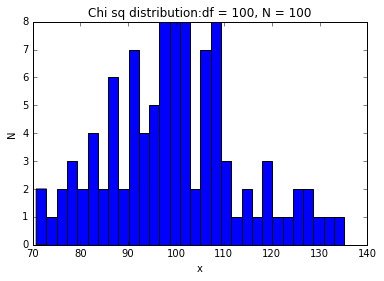

In [76]:
mymean = 100
df = mymean
md = {}
md['chisq'] = np.random.chisquare(df, size=100)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Chi sq distribution:df = 100, N = 100')

In [77]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.66, standard deviation: 13.91


In [78]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


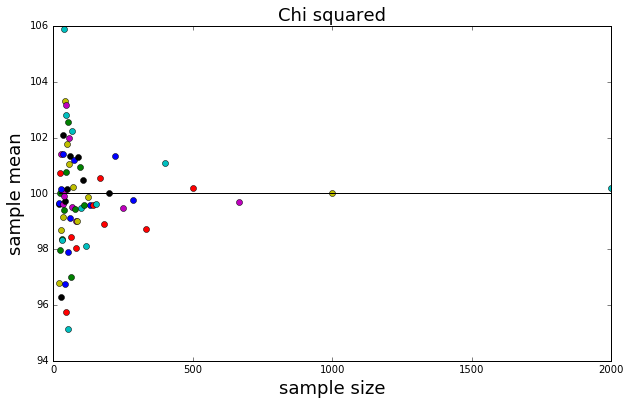

In [79]:
md['chisq'] = {} 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

## As the sample size gets bigger, the sample mean is closer to the actual mean used to generate this distribution. 

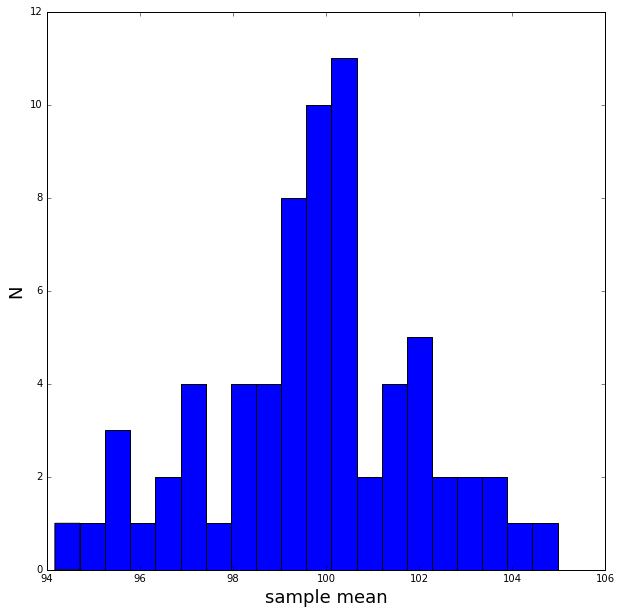

In [59]:
allmeans = list(md['chisq']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins = 20)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## The distribution above looks like a normal distribution. According to the Central Limit Theorem, the distribution of the means of a large number of independent and identically distributed (i.i.d.) samples should be approximately normal, with its mean being around the value used to generate the samples. This plot demonstrates such property. 

# Normal Distribution


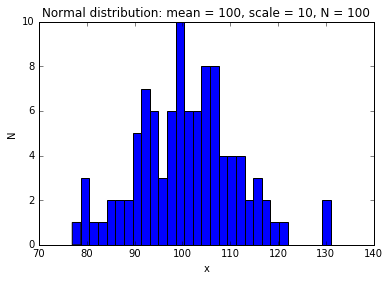

In [60]:
md['normal'] = {} 
normal_mean = mymean
md['normal'] = np.random.normal(normal_mean, scale=10, size=100)
pl.hist(md['normal'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Normal distribution: mean = 100, scale = 10, N = 100')

In [61]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['normal'].mean(), md['normal'].std()))

Normal mean: 100.79, standard deviation: 10.43


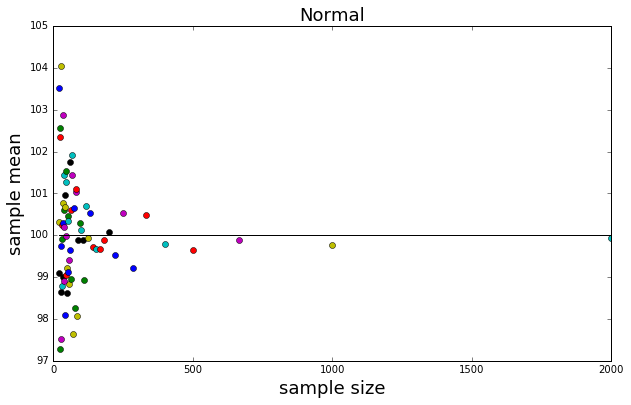

In [65]:
md['normal'] = {} 

for n in mysize:
    md['normal'][n] = np.random.normal(normal_mean, scale = 10, size = n)
       
md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [normal_mean,normal_mean], 'k')
        

## As the sample size gets bigger, the mean values of the generated samples gets closer to the mean. 

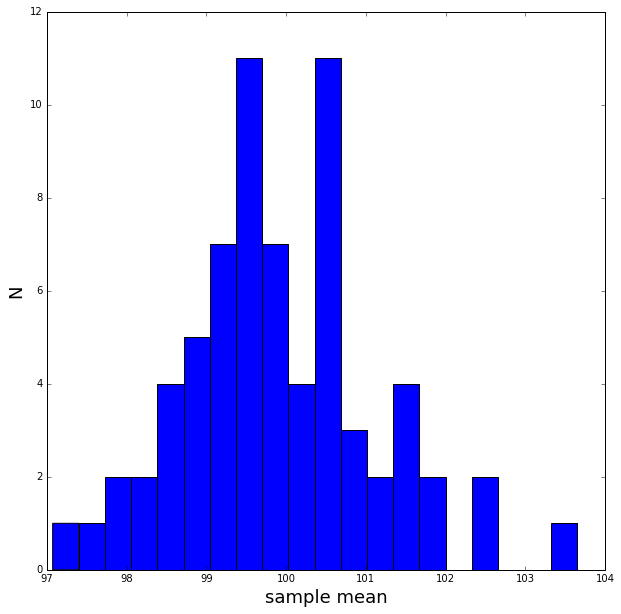

In [63]:
allmeans = list(md['normal']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins = 20)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## The distribution above looks like a normal distribution. According to the Central Limit Theorem, the distribution of the means of a large number of independent and identically distributed (i.i.d.) samples should be approximately normal, with its mean being around the value used to generate the samples. This plot demonstrates such property. 

# Poisson Distribution

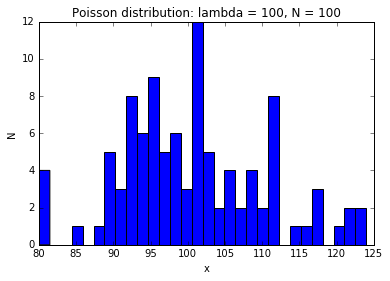

In [67]:
md['poisson'] = {} 
poisson_lambda = mymean
md['poisson'] = np.random.poisson(poisson_lambda, size=100)
pl.hist(md['poisson'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Poisson distribution: lambda = 100, N = 100')

In [69]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))

Poisson mean: 100.68, standard deviation: 9.64


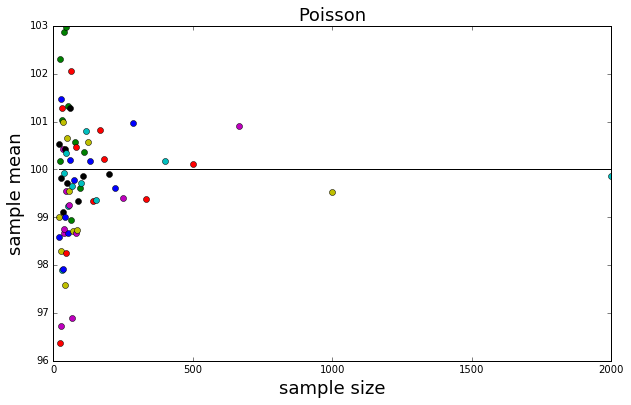

In [73]:
md['poisson'] = {} 

for n in mysize:
    md['poisson'][n] = np.random.poisson(poisson_lambda, size = n)
       
md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [poisson_lambda,poisson_lambda], 'k')

## As the sample size gets bigger, the sample mean is closer to the actual lambda value used to generate this distribution. 

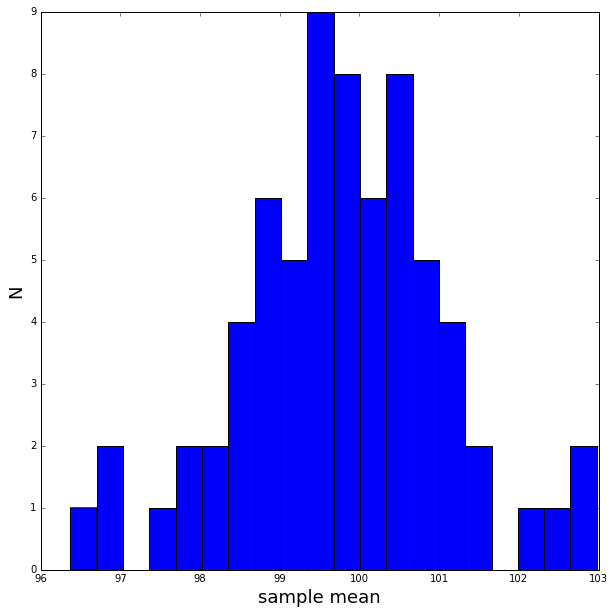

In [75]:
allmeans = list(md['poisson']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins = 20)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## The distribution above looks like a normal distribution. According to the Central Limit Theorem, the distribution of the means of a large number of independent and identically distributed (i.i.d.) samples should be approximately normal, with its mean being around the value used to generate the samples. This plot demonstrates such property. 

# Binomial Distribution

Binomial mean: 100.45, standard deviation: 8.27


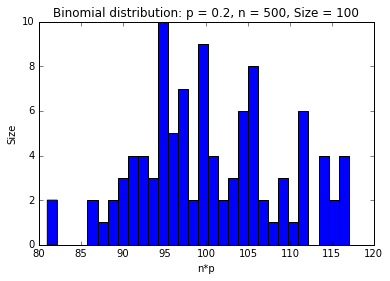

In [98]:
md['binomial'] = {}
n = 500
p = .2
md['binomial'] = np.random.binomial(n, p , size=100)
pl.hist(md['binomial'], bins = 30)
pl.ylabel('Size')
pl.xlabel('n*p')
pl.title('Binomial distribution: p = 0.2, n = 500, Size = 100')
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

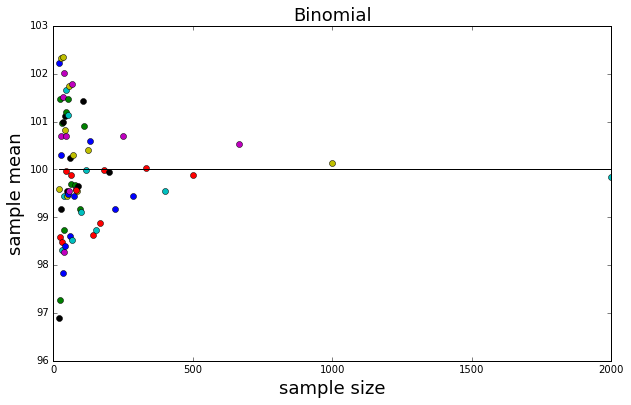

In [82]:
md['binomial'] = {} 

for i in mysize:
    md['binomial'][i] = np.random.binomial(n, p, size = i)
       
md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [n*p,n*p], 'k')

## As the sample size gets bigger, the sample mean is closer to the actual value (n*p) used to generate this distribution. 

In [106]:
allmeans = list(md['binomial']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins = 20, normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

/Users/CCY/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## The distribution above looks like a normal distribution. According to the Central Limit Theorem, the distribution of the means of a large number of independent and identically distributed (i.i.d.) samples should be approximately normal, with its mean being around the value used to generate the samples. This plot demonstrates such property.

# Standard Normal Distribution

Standard Normal mean: -0.00, standard deviation: 1.09


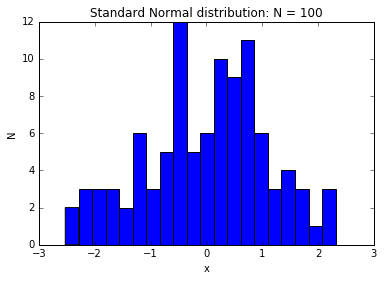

In [99]:
md['standard_normal'] = {}
md['standard_normal'] = np.random.standard_normal(100)
pl.hist(md['standard_normal'], bins = 20)
pl.ylabel('N')
pl.xlabel('x')
print ("Standard Normal mean: %.2f, standard deviation: %.2f"%(md['standard_normal'].mean(), md['standard_normal'].std()))
pl.title('Standard Normal distribution: N = 100')

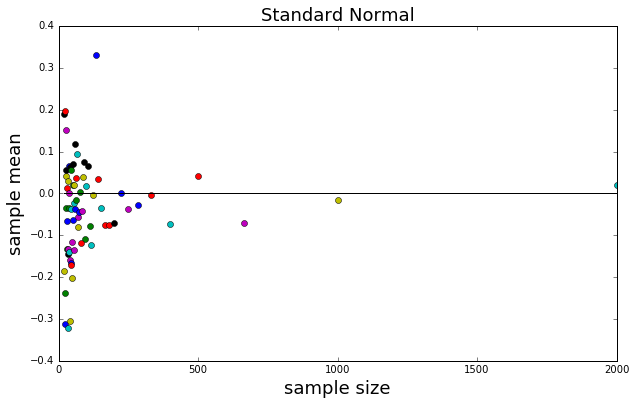

In [101]:
md['standard_normal'] = {}

for n in mysize:
    md['standard_normal'][n] = np.random.standard_normal(n)
md['standard_normal']['means'] = {}
axsd_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['standard_normal']:
    if not type(nn) == str:
        md['standard_normal']['means'][nn] = md['standard_normal'][nn].mean()
        axsd_mu_n.plot(nn, md['standard_normal']['means'][nn], 'o')
        axsd_mu_n.set_xlabel('sample size', fontsize=18)
        axsd_mu_n.set_ylabel('sample mean', fontsize=18)
        axsd_mu_n.set_title('Standard Normal', fontsize=18)
        axsd_mu_n.plot([min(mysize), max(mysize)], [0,0], 'k')

## As the sample size gets bigger, the sample mean is closer to the actual value (0). 

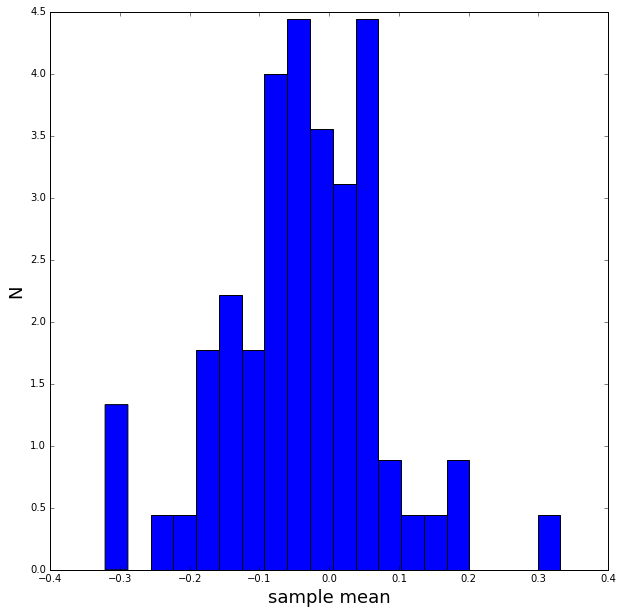

In [105]:
allmeans = list(md['standard_normal']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins = 20)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## The distribution above looks like a normal distribution. According to the Central Limit Theorem, the distribution of the means of a large number of independent and identically distributed (i.i.d.) samples should be approximately normal, with its mean being around the value used to generate the samples. This plot demonstrates such property.